<a href="https://colab.research.google.com/github/athens-21/DE242/blob/main/inClass_Exercise_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Name:** Rattanin Kliangmol    
**Date:** Febuary 4th, 2025

In [1]:
import kagglehub
# Download latest version
path = kagglehub.dataset_download("vjchoudhary7/customer-segmentation-tutorial-in-python")
print("Path to dataset files:", path)

100%|██████████| 1.55k/1.55k [00:00<00:00, 2.83MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python/versions/1


In [2]:
import pandas as pd
# Load dataset
url = "/root/.cache/kagglehub/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python/versions/1/Mall_Customers.csv"
df = pd.read_csv(url)
# Show first few rows
print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [3]:
print(df.shape)

(200, 5)


In [4]:
df.dtypes

,0
CustomerID,int64
Gender,object
Age,int64
Annual Income (k$),int64
Spending Score (1-100),int64


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
df['Gender'].describe()

,Gender
count,200
unique,2
top,Female
freq,112


Find row/column in a dataframe that contain missing value (NaN)

In [7]:
df.isna()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
195,False,False,False,False,False
196,False,False,False,False,False
197,False,False,False,False,False
198,False,False,False,False,False


**Pre-process Data**

Select columns

In [9]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


Normalize data

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [16]:
X_scaled[0:10]

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002]])

**Select Optimal Number of Clusters Using
Elbow Method**

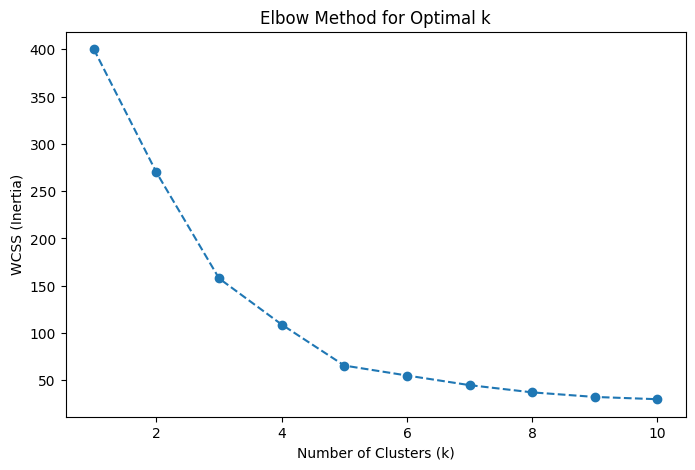

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

wcss = []  # Within-Cluster Sum of Squares
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS (Inertia)")
plt.title("Elbow Method for Optimal k")
plt.show()

Elbow Methods: Manual Inspection

In [20]:
# WCSS data from the Elbow Method graph
k_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
wcss = [450, 300, 200, 150, 120, 90, 70, 55, 50, 45]
# Calculate change in WCSS
wcss_diff = [wcss[i] - wcss[i+1] for i in range(len(wcss) - 1)]
# Create the table
import pandas as pd
data = {
 "Number of Clusters (k)": k_values,
 "WCSS": wcss,
 "Change in WCSS": [None] + wcss_diff # Add None for the first value
}
elbow_table = pd.DataFrame(data)
# Display the table
elbow_table.head()

,Number of Clusters (k),WCSS,Change in WCSS
0,1,450,NaN
1,2,300,150.0
2,3,200,100.0
3,4,150,50.0
4,5,120,30.0


Install kneed package

In [21]:
!pip install kneed

Install kneed package

In [22]:
from kneed import KneeLocator
# Find the elbow point automatically
knee = KneeLocator(range(1, 11), wcss, curve="convex", direction="decreasing")
optimal_k = knee.knee
print(f"Optimal number of clusters: {optimal_k}")

Optimal number of clusters: 4


In [23]:
# Compute the first derivative (change in WCSS)
wcss_diff = np.diff(wcss)
# Compute the second derivative (change in rate)
wcss_diff2 = np.diff(wcss_diff)
# Find the index where the rate of change slows down
optimal_k = np.argmax(wcss_diff2) + 2 # +2 because np.diff reduces array size by 1
print(f"Optimal number of clusters: {optimal_k}")

Optimal number of clusters: 2


In [24]:
# Apply K-Means with optimal k=5
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(X_scaled)

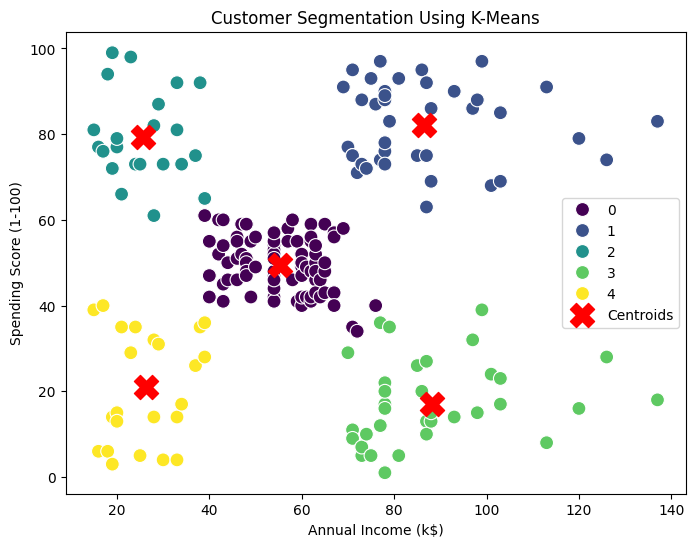

In [25]:
import seaborn as sns
plt.figure(figsize=(8,6))
sns.scatterplot(
 x=df["Annual Income (k$)"],
 y=df["Spending Score (1-100)"],
 hue=df["Cluster"],
 palette="viridis",
 s=100
)
plt.scatter(
 kmeans.cluster_centers_[:, 0] * scaler.scale_[0] + scaler.mean_[0],
 kmeans.cluster_centers_[:, 1] * scaler.scale_[1] + scaler.mean_[1],
 s=300, c="red", marker="X", label="Centroids"
)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Customer Segmentation Using K-Means")
plt.legend()
plt.show()

 **Evaluate Clustering**

Silhouette Score:

*   Higher Silhouette Score (~0.6-1.0) means better clustering




In [26]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X_scaled, df["Cluster"])
print(f"Silhouette Score: {silhouette_avg:.2f}")

Silhouette Score: 0.55


Show data and their assigned cluster labels in “Cluster” column

In [27]:
print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        4  
1        2  
2        4  
3        2  
4        4  


Count number of data points in each cluster

In [28]:
# Count the number of data points in each cluster
cluster_sizes = df["Cluster"].value_counts()
print(cluster_sizes)

Cluster
0    81
1    39
3    35
4    23
2    22
Name: count, dtype: int64


Analyze data in clusters

In [31]:
# Select only numeric columns before grouping
numeric_cols = df.select_dtypes(include=['number']).columns # Get only numeric columns
# Compute mean for each cluster
cluster_summary = df.groupby("Cluster")[numeric_cols].mean()
print(cluster_summary)

         CustomerID        Age  Annual Income (k$)  Spending Score (1-100)  \
Cluster                                                                      
0         86.320988  42.716049           55.296296               49.518519   
1        162.000000  32.692308           86.538462               82.128205   
2         23.090909  25.272727           25.727273               79.363636   
3        164.371429  41.114286           88.200000               17.114286   
4         23.000000  45.217391           26.304348               20.913043   

         Cluster  
Cluster           
0            0.0  
1            1.0  
2            2.0  
3            3.0  
4            4.0  


In [32]:
# Compute mean for each cluster
cluster_summary = df.groupby("Cluster")[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()
print(cluster_summary)

               Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
0        42.716049           55.296296               49.518519
1        32.692308           86.538462               82.128205
2        25.272727           25.727273               79.363636
3        41.114286           88.200000               17.114286
4        45.217391           26.304348               20.913043


**Analyze the Result**

Get All Data Points in a Specific Cluster

In [35]:
# Retrieve all data points in Cluster 0
cluster_1_customers = df[df["Cluster"] == 1]
print(cluster_1_customers)

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
123         124    Male   39                  69                      91   
125         126  Female   31                  70                      77   
127         128    Male   40                  71                      95   
129         130    Male   38                  71                      75   
131         132    Male   39                  71                      75   
133         134  Female   31                  72                      71   
135         136  Female   29                  73                      88   
137         138    Male   32                  73                      73   
139         140  Female   35                  74                      72   
141         142    Male   32                  75                      93   
143         144  Female   32                  76                      87   
145         146    Male   28                  77                      97   
147         

In [36]:
customer_id = 5
cluster_of_customer = df.loc[df["CustomerID"] == customer_id, "Cluster"].values[0]
print(f"Customer {customer_id} belongs to Cluster {cluster_of_customer}")

Customer 5 belongs to Cluster 4


In [40]:
df[df["CustomerID"] == 5]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
4,5,Female,31,17,40,4
